In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np

In [4]:
file_path = '2025-04-11-064809-WAHOOAPPIOS2150-2-0-record.csv'
ecg_df = pd.read_csv(file_path)

In [5]:
print("Columns in ECG CSV:", ecg_df.columns)

Columns in ECG CSV: Index(['timestamp', 'position_lat', 'position_long', 'heart_rate', 'distance',
       'grade', 'gps_accuracy', 'vertical_speed', 'calories', 'enhanced_speed',
       'enhanced_altitude', 'battery_soc', 'descent_0_4', 'ascent_12_0',
       'lat_gps_15_0', 'lon_gps_16_0'],
      dtype='object')


In [6]:
ecg_df.columns = [col.strip() for col in ecg_df.columns]

In [7]:
if 'timestamp' in ecg_df.columns:
    time_col = 'timestamp'
elif 'time' in ecg_df.columns:
    time_col = 'time'
else:
    # fallback: create one
    ecg_df['time'] = np.arange(0, len(ecg_df)) / 1  # assume 1 Hz
    time_col = 'time'

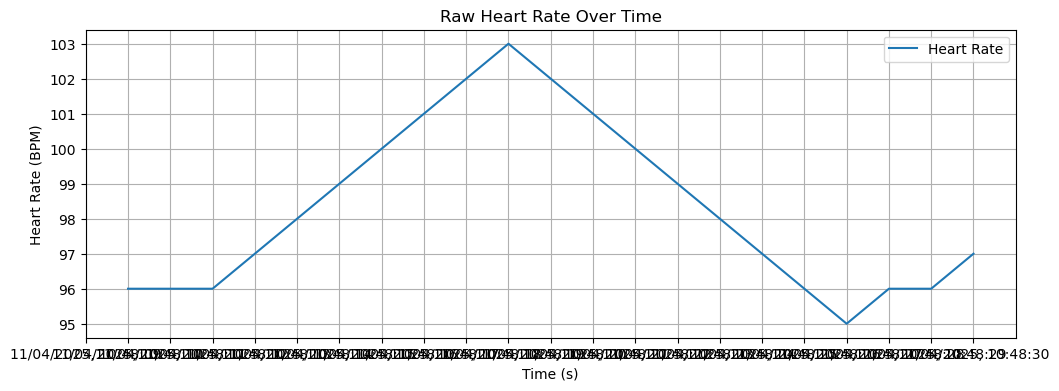

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(ecg_df[time_col], ecg_df['heart_rate'], label='Heart Rate')
plt.title('Raw Heart Rate Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
ecg_df['smoothed'] = ecg_df['heart_rate'].rolling(window=5).mean()

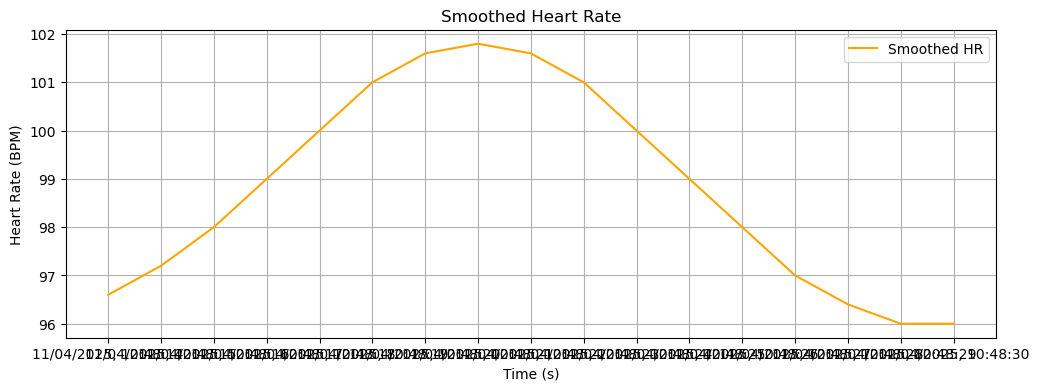

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(ecg_df[time_col], ecg_df['smoothed'], label='Smoothed HR', color='orange')
plt.title('Smoothed Heart Rate')
plt.xlabel('Time (s)')
plt.ylabel('Heart Rate (BPM)')
plt.grid(True)
plt.legend()
plt.show()

In [12]:
print("Mean HR:", ecg_df['heart_rate'].mean(), "BPM")
print("Max HR:", ecg_df['heart_rate'].max(), "BPM")
print("Min HR:", ecg_df['heart_rate'].min(), "BPM")

Mean HR: 98.33333333333333 BPM
Max HR: 103.0 BPM
Min HR: 95.0 BPM


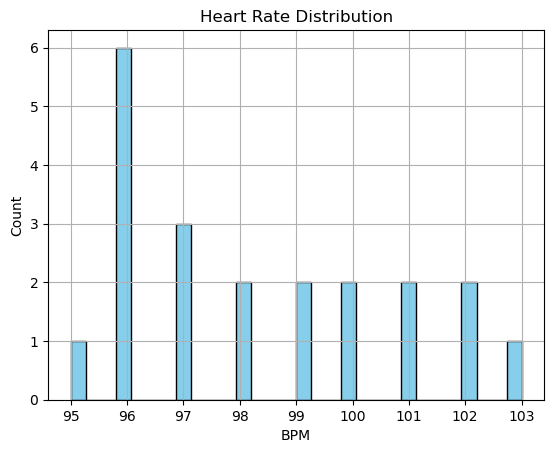

In [13]:
plt.figure()
ecg_df['heart_rate'].plot.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Heart Rate Distribution')
plt.xlabel('BPM')
plt.ylabel('Count')
plt.grid(True)
plt.show()